In [1]:
#Modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Importing the dataset
pokemon = pd.read_csv('Pokemon.csv')

In [11]:
pokemon.shape

(800, 13)

In [24]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


There are a couple of interesting things here. First of all, we can see that some pokemon can have different versions of themselves. For example, Venusaur and Mega Venusaur. These different versions are counted as one pokemon. So even though the dataset has 800 rows, the total number of distinct pokemon will be lower. Let's find this number 

In [12]:
pokemon['#'].nunique()

721

To make the pokemon names clearer, we will delete the string that comes before the word Mega.

In [3]:
pokemon['Name'] = pokemon['Name'].str.replace('.*(?=Mega)', '')

In [4]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [10]:
# Some statistics of the numerical variables
pokemon.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [64]:
# The different types of pokemon
pokemon['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [65]:
# The five most common types
pokemon['Type 1'].value_counts().head(5)

Water      112
Normal      98
Grass       70
Bug         69
Psychic     57
Name: Type 1, dtype: int64

In [18]:
# Five most rare types
pokemon['Type 1'].value_counts().sort_values().head(5)

Flying       4
Fairy       17
Ice         24
Fighting    27
Steel       27
Name: Type 1, dtype: int64

In [69]:
# How many Legendary pokemon are there??
sum(pokemon['Legendary'] == True)

65

In [77]:
# How many pokemon have a second type?
sum(pokemon['Type 2'].notnull())

# Over 50 percent of the pokemon have a second type

414

In [7]:
# Number of pokemon in each generation
pokemon.groupby('Generation')['Name'].count()

Generation
1    166
2    106
3    160
4    121
5    165
6     82
Name: Name, dtype: int64

In [6]:
# Do pokemon get stronger in newer generations?
pokemon.groupby('Generation')['Total'].mean()

Generation
1    426.813253
2    418.283019
3    436.225000
4    459.016529
5    434.987879
6    436.378049
Name: Total, dtype: float64

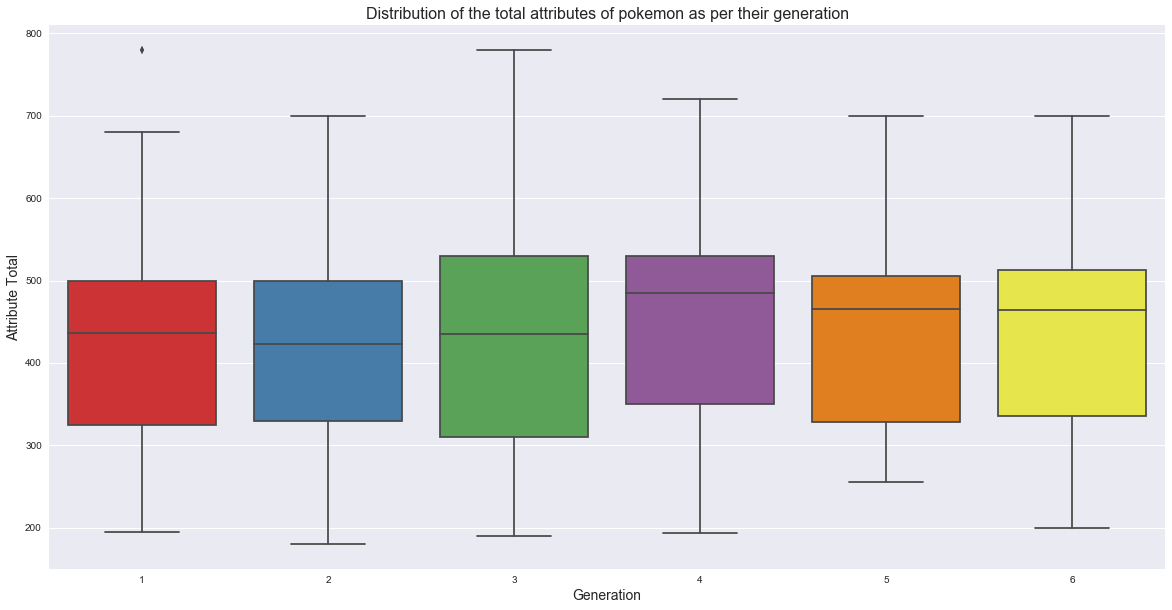

In [15]:
plt.figure(figsize=(20,10))
sns.boxplot(x = 'Generation', y='Total', data=pokemon, palette = 'Set1')
plt.xlabel('Generation', fontsize = 14)
plt.ylabel('Attribute Total', fontsize = 14)
plt.title('Distribution of the total attributes of pokemon as per their generation', fontsize = 16)

It looks as if the there is not a lot of variation in the strength of the pokemon across generations. However, generations 4, 5, 
and 6 have a higher median. This means that the pokemon in this generation are stronger than the earlier generations.
<script src="https://npmcdn.com/jupyter-js-widgets@~1.2.0/dist/embed.js"></script><script type="application/vnd.jupyter-embedded-widgets">{}</script>

In [17]:
# The outlier in Generation 1
pokemon[(pokemon['Generation'] == 1) & (pokemon['Total'] > 700)]['Name']

163    Mega Mewtwo X
164    Mega Mewtwo Y
Name: Name, dtype: object

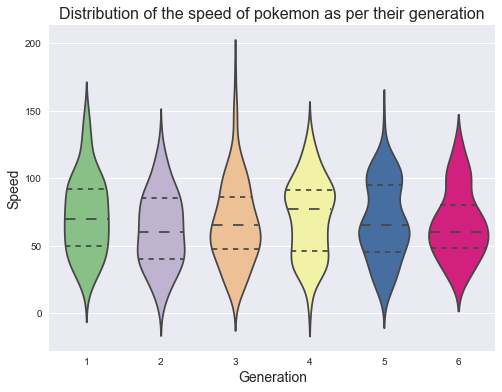

In [8]:
# Does the speed vary with generation?
plt.figure(figsize=(8,6))
sns.violinplot(x = 'Generation', y = 'Speed', data=pokemon, palette='Accent', inner = 'quartiles')
plt.xlabel('Generation', fontsize = 14)
plt.ylabel('Speed', fontsize = 14)
plt.title('Distribution of the speed of pokemon as per their generation', fontsize = 16)

Generation 4 has a the highest median speed. For the rest of the generations, the speeds are distrbuted similarly. Generation 6 
has the narrowest distribution. The fastest pokemon is from Generation 3.
<script src="https://npmcdn.com/jupyter-js-widgets@~1.2.0/dist/embed.js"></script><script type="application/vnd.jupyter-embedded-widgets">{}</script>

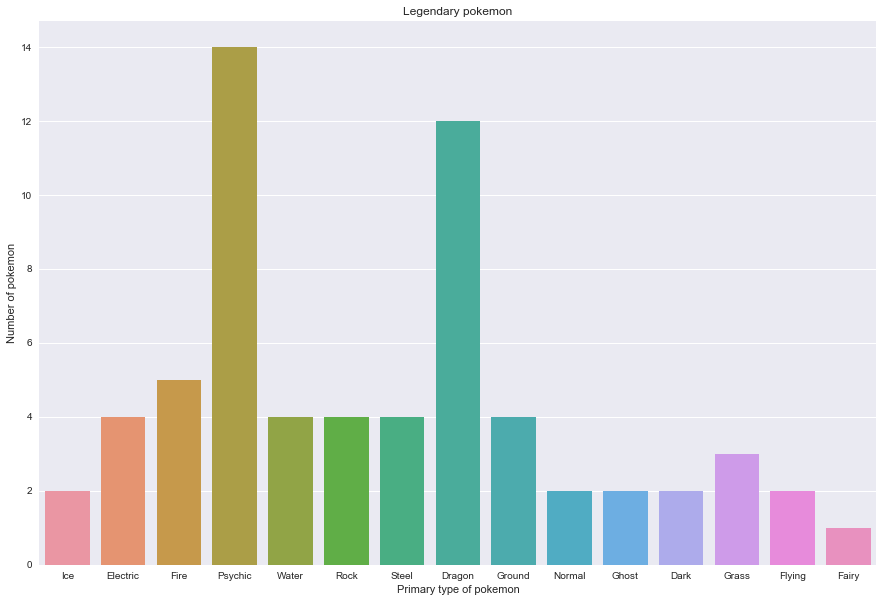

In [11]:
plt.figure(figsize=(15,10))
sns.countplot(pokemon[pokemon['Legendary'] == True]['Type 1'])
plt.xlabel('Primary type of pokemon')
plt.ylabel('Number of pokemon')
plt.title('Legendary pokemon')

In [36]:
# Number of legendary pokemon in each generation
pokemon[pokemon['Legendary']==True].groupby('Generation')['Legendary'].agg('count')

Generation
1     6
2     5
3    18
4    13
5    15
6     8
Name: Legendary, dtype: int64

In [13]:
gen_types = pokemon.groupby(['Generation', 'Type 1'])['#'].agg('count').reset_index()

In [18]:
gen_types = gen_types.pivot(index='Generation', columns='Type 1', values="#")

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5]),
 <a list of 18 Text xticklabel objects>)

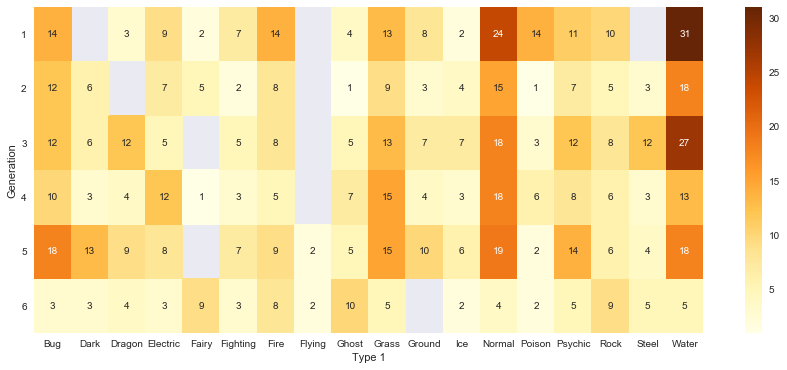

In [34]:
plt.figure(figsize=(15,6))
sns.heatmap(gen_types, annot=True, cmap='YlOrBr')
plt.yticks(rotation=0)
plt.xticks(rotation=0)

AttributeError: 'JointGrid' object has no attribute 'map'

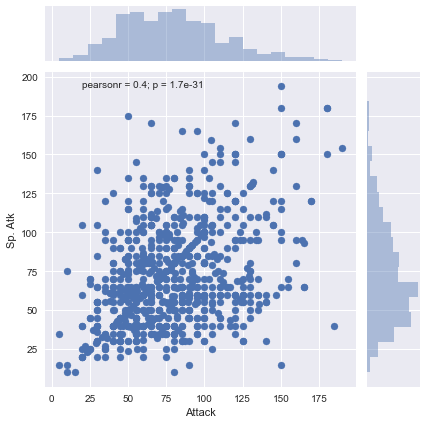

In [41]:
a = sns.jointplot(x='Attack',  y='Sp. Atk', data=pokemon)
a = a.map(plt.scatter, sns.distplot)

AttributeError: 'JointGrid' object has no attribute 'map'

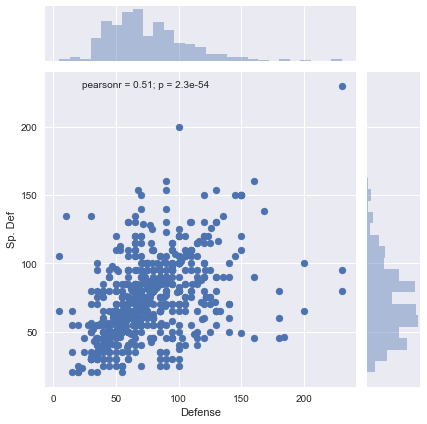

In [42]:
a = sns.jointplot(x='Defense',  y='Sp. Def', data=pokemon)
a = a.map(plt.scatter, sns.distplot)

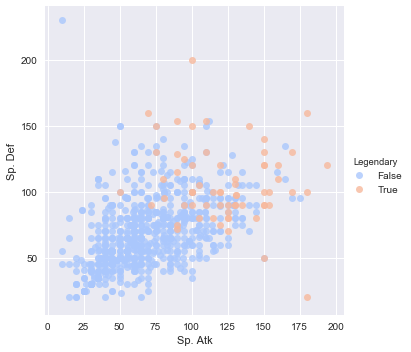

In [46]:
sns.lmplot(x='Sp. Atk', y='Sp. Def', data=pokemon, hue='Legendary', fit_reg=False, palette='coolwarm')

In [8]:
# How many pokemon names begin with a vowel?
vowels = ['A', 'E', 'I', 'O', 'U']
names_count = []
for value in vowels:
    counter = sum(pokemon['Name'].str.startswith(value))
    names_count.append(counter)
    
print(names_count)

[34, 21, 5, 6, 5]
